In [54]:
# This code runs a supervised machine learning model to classify and predict sofware bug in the provided dataset
# The current configuration sets current test size to 20% of the total dataset.

In [55]:
# import all modules necessary
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# Leave this as as. 
# Read the dataset from CSV
data = pd.read_csv('Synapse.csv')
# Drop the column named File becuase it is relevant. 
data = data.drop(['File'], axis=1)


In [57]:
# You may here split the data and include certain features. If nothin is left here, all features will be included in the model

In [58]:
# Leave this as as. 
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [59]:
# Leave this as as. 
# Function to plot the correlation matrix
def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()


In [60]:
# Leave this as as. 
# Function to plot the correlation between features and the response variable
def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

In [61]:
# Leave this as as. 
# Define the feature set and the target variable
X = data.drop(['BUG'], axis=1) # X is alway everyting except for the last column we are trying to predict/ classify
y = data['BUG']                # y is alwasy the response variable
 

In [62]:
# Split the dataset into training and test sets. 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


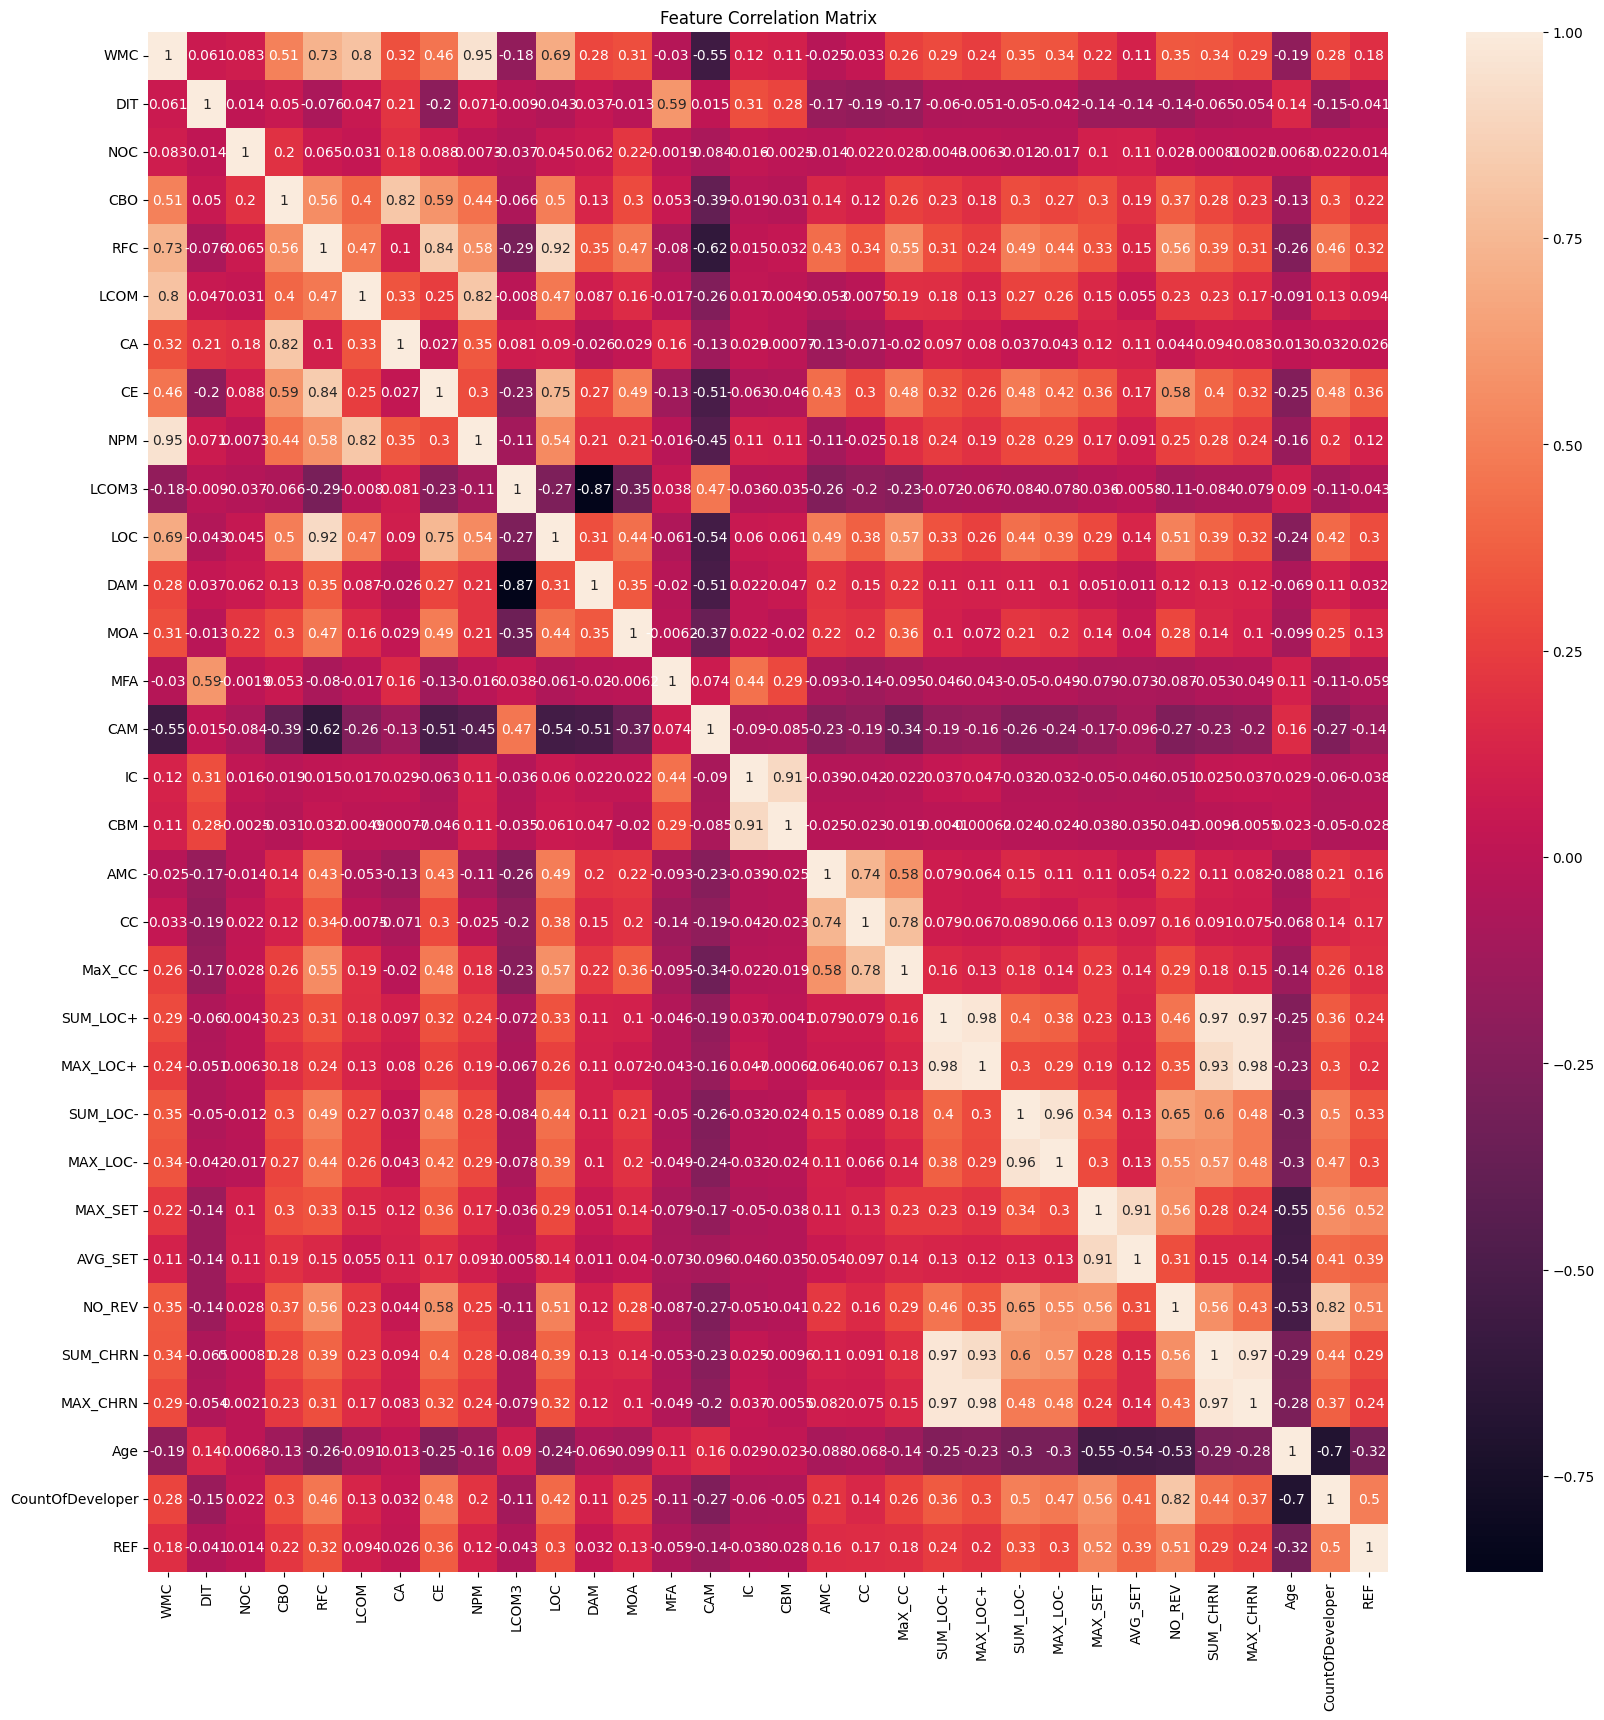

In [43]:
# Leave this as as. 
# Plot the correlation matrix for the features in the dataset
plt.figure(figsize=(20, 20))
plot_correlation_matrix(X)

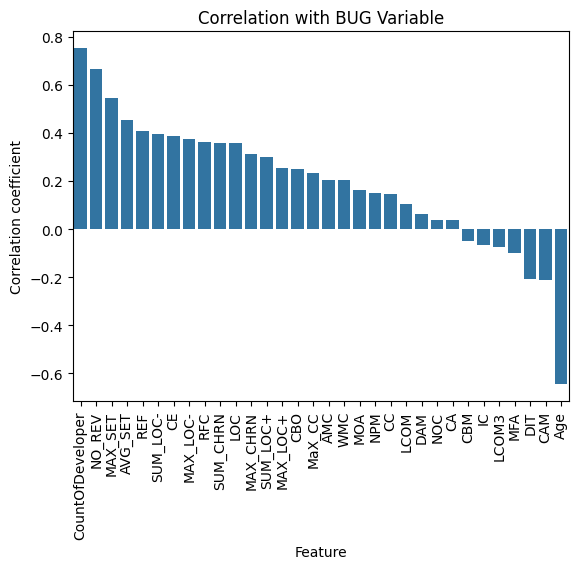

In [44]:
# Leave this as as. 
# Add the target variable back for correlation calculation
data_for_correlation = X.copy()
data_for_correlation['BUG'] = y

# Plot the correlation matrix for features and the BUG variable
plot_feature_response_correlation(data_for_correlation, 'BUG')


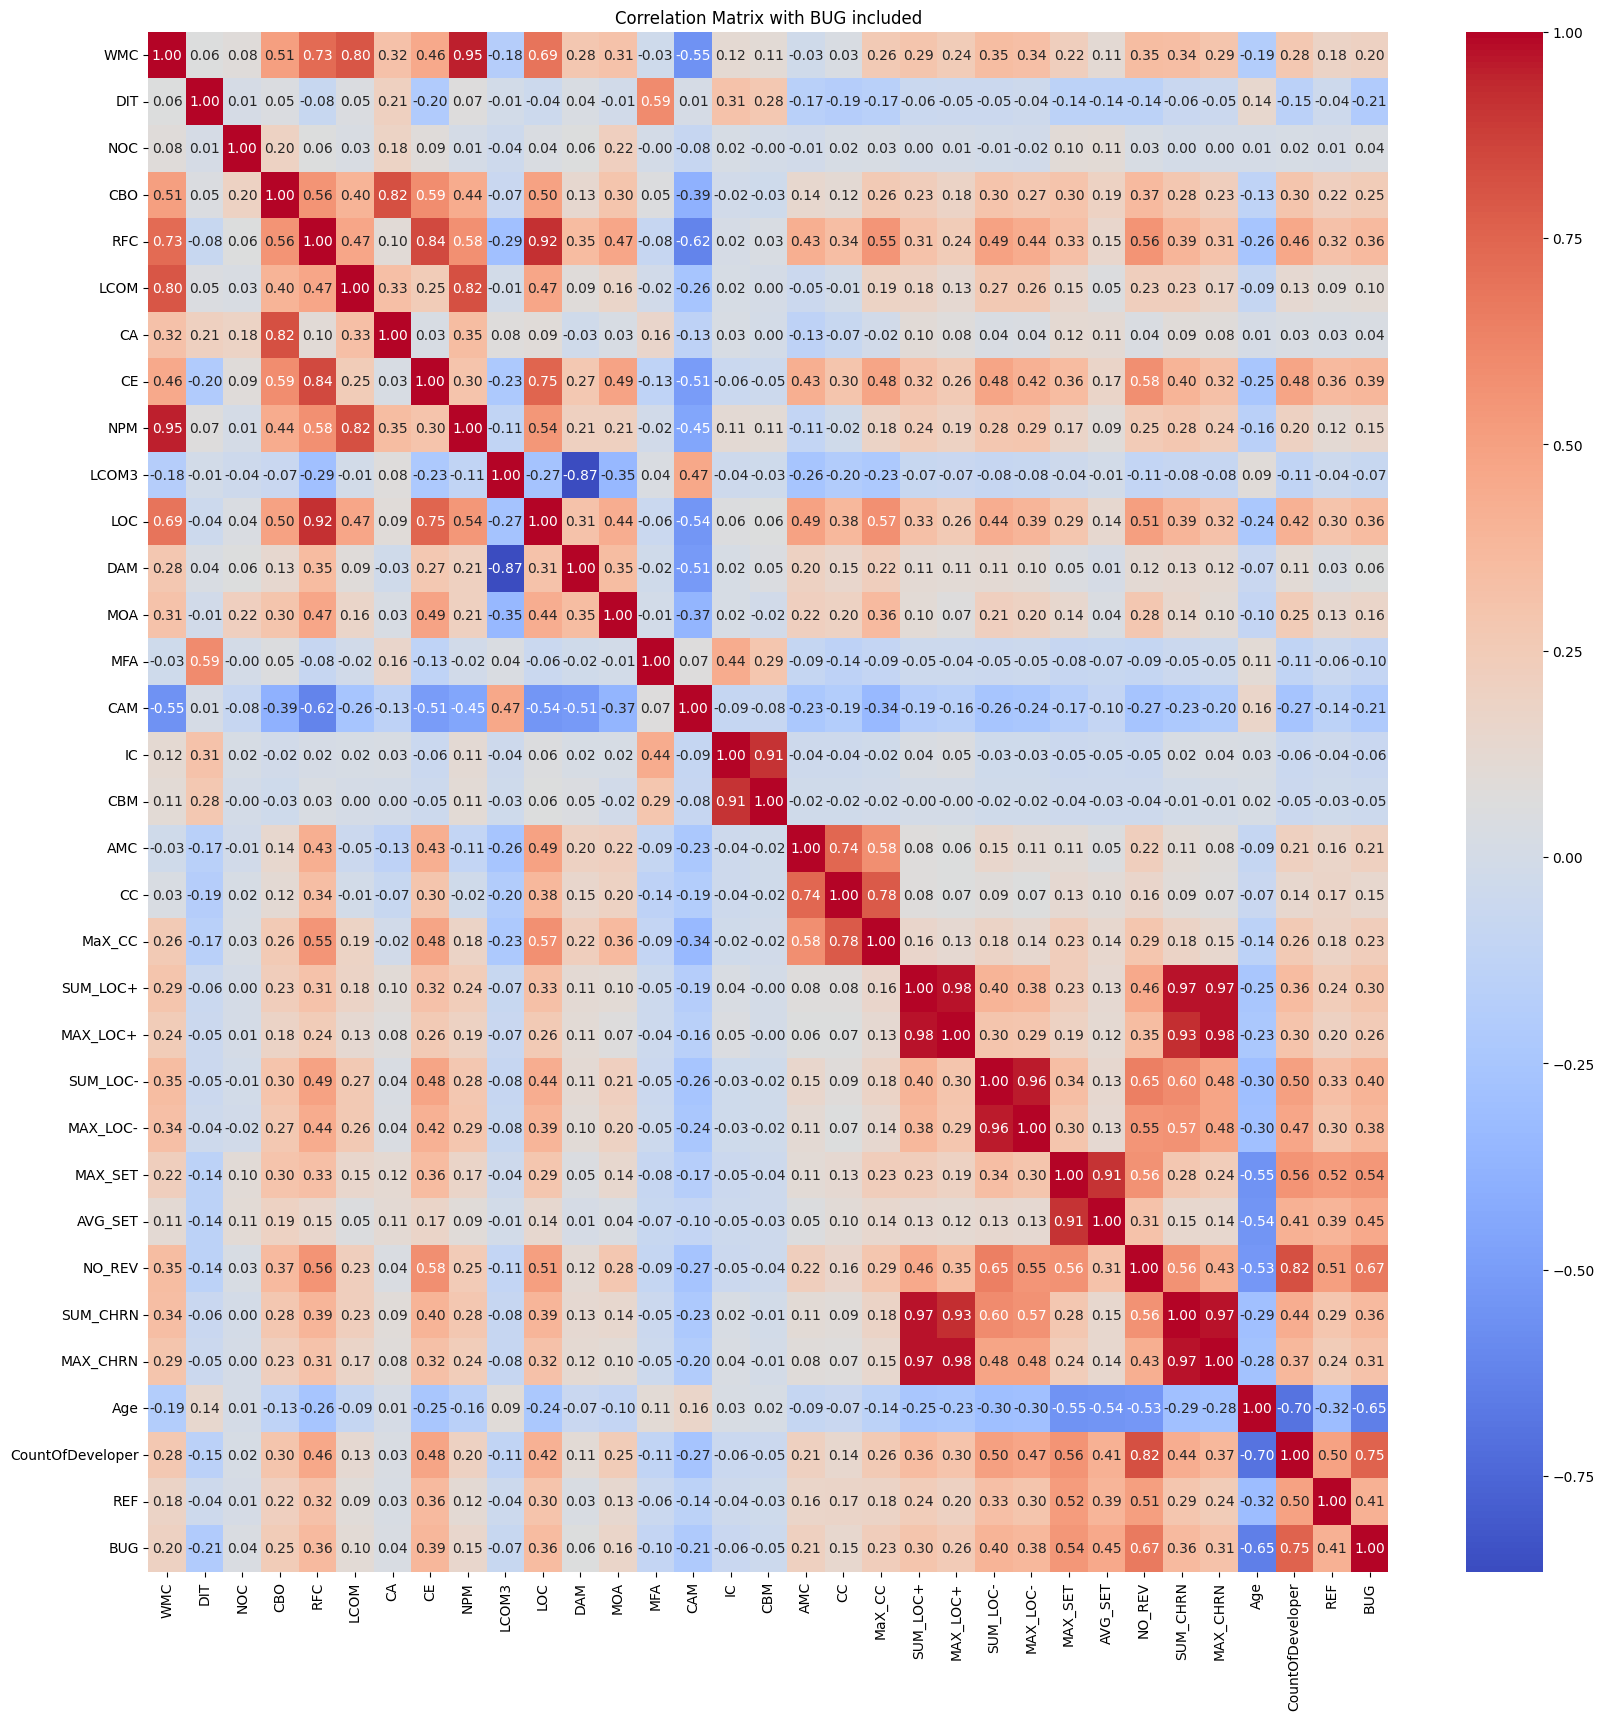

In [45]:
# Leave this as as. 

# Assuming 'data' is your DataFrame and it includes the 'BUG' column

# Calculate the correlation matrix including all features and the response variable 'BUG'
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with BUG included')
plt.show()


In [52]:

# Define the classifiers
# Here is a list of five classifiers that you may choose in your homweork. 
# To choose a classifier (or more), uncomment the classifiler name
classifiers = {
    #'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'LogisticRegression': LogisticRegression(max_iter=1000),
    #'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(random_state=42)
}




Classifier: RandomForest
Confusion Matrix:
[[101   9]
 [  8  27]]


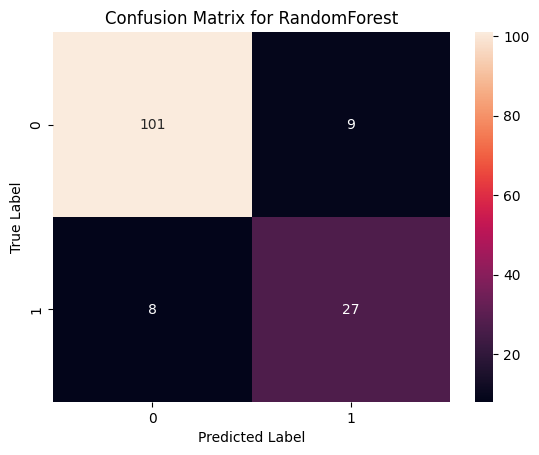


Classifier: LogisticRegression
Confusion Matrix:
[[101   9]
 [  8  27]]


C:\ProgramData\miniconda3\envs\pythonCYBR520\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


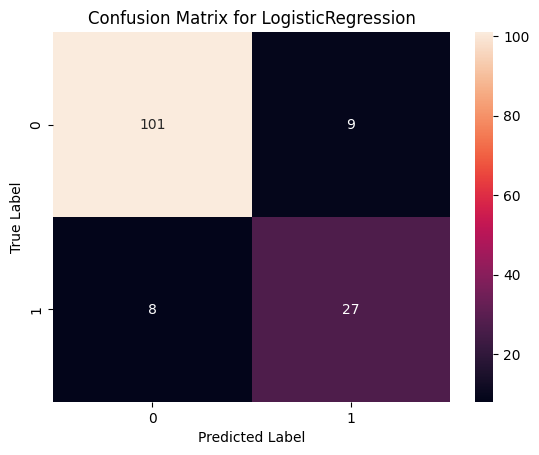


Classifier: SVC
Confusion Matrix:
[[101   9]
 [  8  27]]


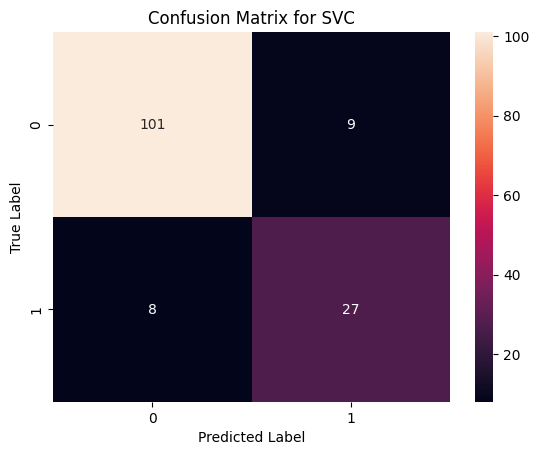


Classifier: KNeighbors
Confusion Matrix:
[[101   9]
 [  8  27]]


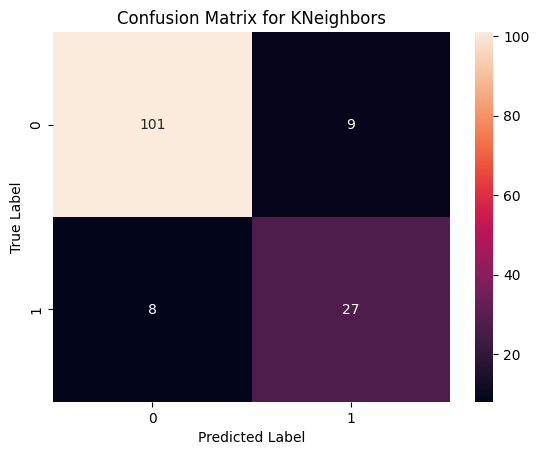


Classifier: DecisionTree
Confusion Matrix:
[[101   9]
 [  8  27]]


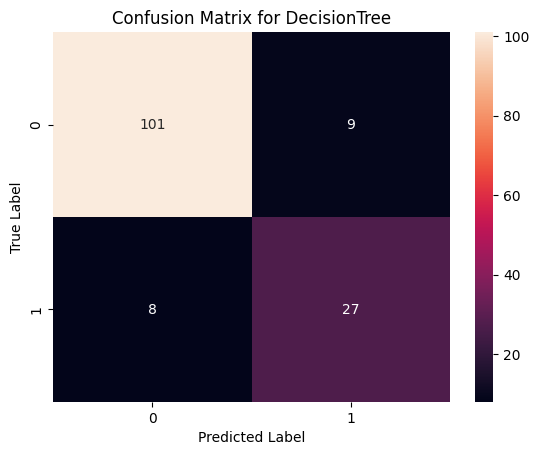

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

# Leave this as is.
# Iterate through the classifiers and evaluate each one
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    
    # Print classifier name and confusion matrix
    print(f"\nClassifier: {name}")
    print(f"Confusion Matrix:\n{cm}")

    # Optionally, you can uncomment the next line if you have the plot_confusion_matrix function defined
    plot_confusion_matrix(cm, name)

